# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D, AveragePooling2D
from keras.utils import np_utils
from keras import initializers
from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)
(10000, 28, 28)


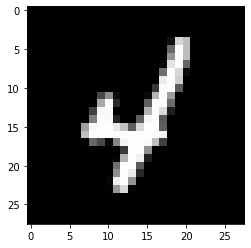

In [4]:
print (X_train.shape)
print (X_test.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[363], cmap='gray')

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [10]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', kernel_initializer=keras.initializers.he_uniform(seed=None), input_shape=(28,28,1)))
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(Convolution2D(128, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides=None))
model.add(Convolution2D(64, 1, activation='relu'))
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(Convolution2D(128, 3, 3, activation='relu'))
model.add(Convolution2D(256, 3, 3, activation='relu' ))
model.add(Convolution2D(256, 3, 3, activation='relu' ))
model.add(Convolution2D(10, 3))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", kernel_initializer=<keras.ini..., input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  # This is added back by InteractiveShellAp

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        8256      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 9, 9, 64)          36928     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 128)        

In [12]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [13]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.





Epoch 1/10





60000/60000 [==============================] - 56s 935us/step - loss: 0.1332 - acc: 0.9579
Epoch 2/10
60000/60000 [==============================] - 49s 814us/step - loss: 0.0505 - acc: 0.9852
Epoch 3/10
60000/60000 [==============================] - 49s 810us/step - loss: 0.0384 - acc: 0.9888
Epoch 4/10
60000/60000 [==============================] - 48s 807us/step - loss: 0.0305 - acc: 0.9912
Epoch 5/10
60000/60000 [==============================] - 49s 809us/step - loss: 0.0244 - acc: 0.9927
Epoch 6/10
60000/60000 [==============================] - 48s 792us/step - loss: 0.0212 - acc: 0.9939
Epoch 7/10
60000/60000 [==============================] - 47s 786us/step - loss: 0.0180 - acc: 0.9945
Epoch 8/10
60000/60000 [==============================] - 47s 788us/step - loss: 0.0187 - acc: 0.9946
Epoch 9/10
60000/60000 [==============================] - 47s 787us/step - loss: 0.0166 - acc: 0.9950
Epoch 10/10
60000/60000 [==============================] - 47s 782us/step 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [15]:
print(score)

[0.02935326900383202, 0.9936]


In [0]:
y_pred = model.predict(X_test)

In [17]:
print(y_pred[:9])
print(y_test[:9])

[[4.9733728e-17 4.3469121e-14 5.5833769e-14 3.0249473e-11 1.7337626e-13
  2.1509531e-15 2.8133395e-19 1.0000000e+00 3.4712304e-18 2.6002646e-13]
 [7.0808623e-11 1.7438208e-10 1.0000000e+00 2.5246892e-13 6.5045625e-14
  2.6664465e-16 2.5945278e-13 2.8764263e-12 8.2786902e-13 2.5019821e-16]
 [5.0689933e-15 1.0000000e+00 1.5281853e-13 7.3340923e-17 1.3660782e-13
  4.3345186e-10 2.7568039e-12 9.6097094e-14 3.2405675e-12 3.4707820e-17]
 [1.0000000e+00 6.1291258e-17 7.2285419e-14 1.0276368e-11 4.6049620e-14
  6.1752747e-10 9.8017505e-10 1.2251019e-11 1.2685011e-13 4.0221810e-12]
 [1.0718195e-17 6.7406756e-17 1.6438705e-18 2.5776504e-19 1.0000000e+00
  2.5970038e-20 1.3732164e-19 2.2272502e-19 1.6794629e-16 1.5173922e-13]
 [5.8080907e-20 1.0000000e+00 1.5035776e-17 4.4071278e-22 3.6537058e-15
  1.6441750e-14 9.4376596e-17 1.7201702e-15 1.2469389e-15 7.7832356e-21]
 [6.8424807e-20 8.5211230e-14 8.9675246e-18 3.1165714e-16 1.0000000e+00
  1.1574206e-16 2.0964785e-19 3.7443022e-17 1.7199160e-13 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

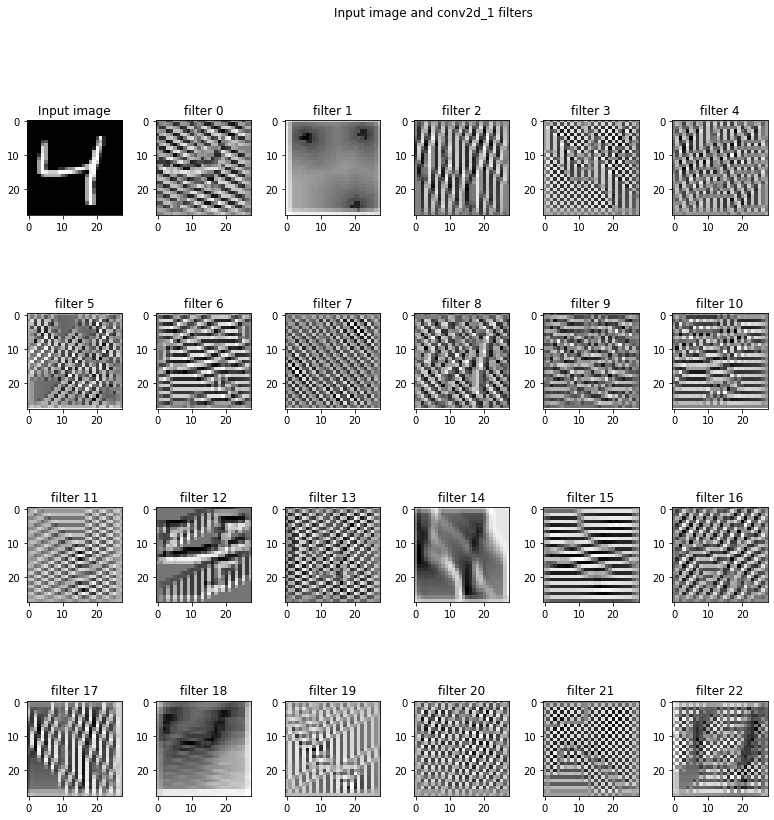

In [19]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_1'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()